# 5.나랑 닮은 연예인은 누구?

## 5-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자

지금부터는 위에서 배운 내용을 토대로 연예인 사진과 나를 비교해 보는 시간을 갖도록 하겠습니다!

### Step1. 사진 모으기
<hr>

비교하려면 사진을 모아야겠죠? 우선 나만 볼 테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다. 평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.
사진을 하나의 디렉토리 안에 모아 봅시다. 모을 때 사진의 파일명은 가급적 장동건.jpg, 김태희.png와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋습니다. (설마 이분들과 닮았다고 생각하시는 것은?? 😅)

1. 내 사진 찍기

내 사진을 2장 이상 포함합시다.
내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.

2. 비교할 연예인 사진 모으기

많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.

my_file_list: ['potato3.jpg', 'potato2.jpg', 'potato1.jpg', 'potato4.jpg']


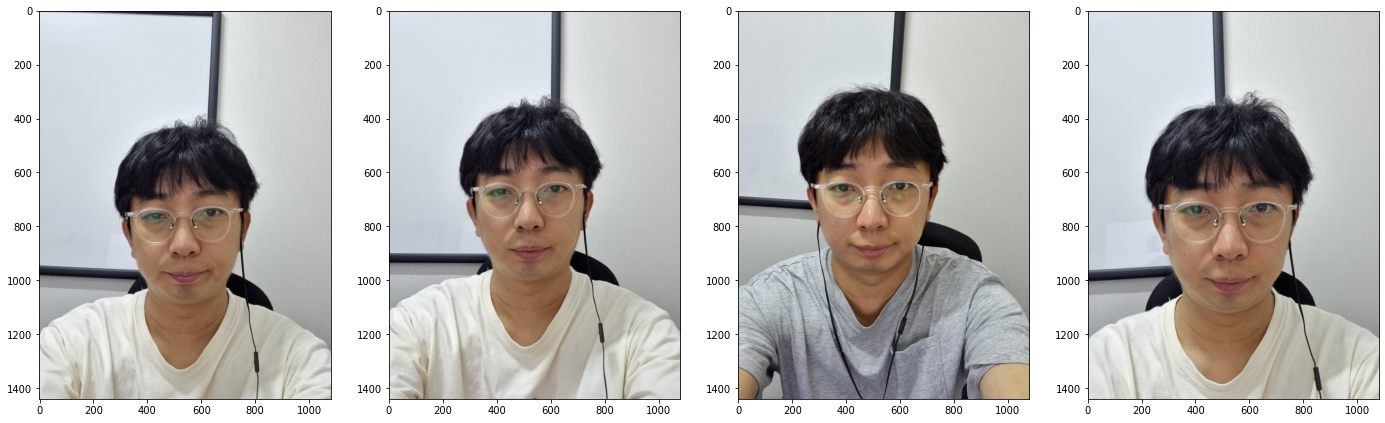

In [5]:
# 1. 내 사진 확인
import os

my_dir_path = os.getenv('HOME')+'/aiffel/my_resembles_entertainer/my_img'
my_file_list = os.listdir(my_dir_path)

print ("my_file_list: {}".format(my_file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(my_dir_path+'/'+my_file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

file_list: ['정국.jpg', '손흥민.jpg', '류승룡.jpeg', '정민철.jpg', '류준열.jpg', '김C.jpeg', '김대중.jpg', '박진영.jpg', '잭 스페이더.jpeg', '잇지예지.jpeg', '성시경.jpg', '김경진.png', '이말년.png', '도지한.jpg', '공유.jpg', '대도서관.jpeg', '지디.jpg', '한기범.jpg', '황정민.jpg', '지호.jpg', '티모시 달튼.jpeg', '조승우.jpeg', '매드클라운.jpeg', '티파니.jpg', '이명박.jpg', '박재범.jpg', '이승환.jpg', '장원영.jpeg', '잭 갤리퍼내키스.jpg', '박휘순.jpg', '드웨인 존슨.jpg', '마동석.jpeg', '크리스 에반스.jpg', '시우민.jpg', '류현진.jpg', '꽈두룹.jpeg', '리암 니슨.png', '피어스 브로스넌.jpg', '마크 러팔로.jpeg', '조정석.jpg', '이진호.jpeg', '유해진.jpg', '리사.jpg', '채연.jpg', '이영하.jpg', '사무엘 L 잭슨.jpg', '무라니시.png', '택연.jpg', '옥냥이.jpeg', '조달환.png', '정준하.jpg', 'bush.jpeg', '이정재.jpeg', '아이즈원조유리.jpeg', '곽도원.jpg', '이민호.jpeg', '최민식.jpg', '박나래.jpeg', '김구라.jpg', '문별.jpg', '화사.jpg', '슈퍼비.jpeg', '박명수.jpg', '차두리.jpeg', '존 파브르.jpeg', 'RM.jpg', '여자아이들수진.jpeg', '클린트 이스트우드.jpg', '문재인.jpeg', '박건우.png', '크리스 햄스워스.jpg', '이동국.jpeg', '안재홍.jpg', '철면수심.jpg', '온앤오프효진.jpg', '권태원.jpeg', '트와이스미나.jpg', '아이즈원김채원.jpg', '톰 홀랜드.jpg', '윤아.jpg', '켄 정.jpeg', '김광현.jpg'

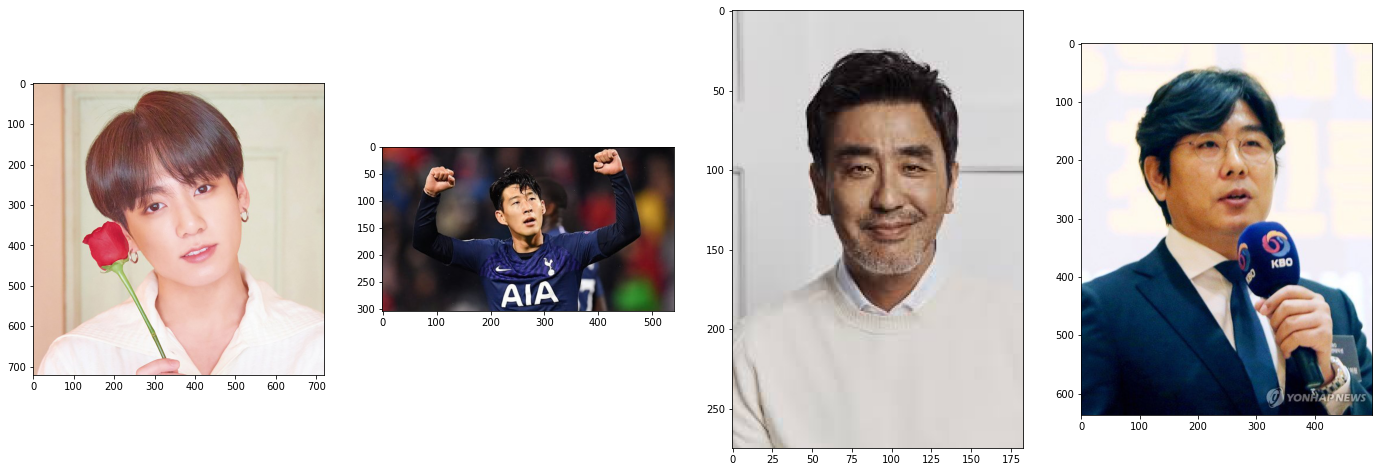

In [8]:
# 2. 연예인 사진 확인 ( + 내사진 )
import os

dir_path = os.getenv('HOME')+'/aiffel/my_resembles_entertainer/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

### Step2. 얼굴 영역 자르기
<hr>

임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_cropped_face(image_file)을 통해서 잘라줍시다! 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.

```
#    힌트
#    from PIL import Image
#    face = get_cropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)
```

In [14]:
#    힌트
#    from PIL import Image
#    face = get_cropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)

import face_recognition
import os
from PIL import Image

# 이미지에서 얼굴 찾기
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0:  # 이미지를 못찾으면 None 리턴
        print('image_file is not found face!!:', image_file)
        return None
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face


# 폴더내의 이미지에 대해 얼굴이미지만 별도 저장
def get_face_image(dir_path):
    path_to_save = os.getenv('HOME')+'/aiffel/my_resembles_entertainer/face'
    file_list = os.listdir(dir_path)
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face is None:
            continue;
        # 얼굴정보가 있으면 저장
        pillow_image = Image.fromarray(face)
        pillow_image.save(path_to_save+'/'+file)

        
# 얼굴이미지 구하기 
dir_path = os.getenv('HOME')+'/aiffel/my_resembles_entertainer/celebrity'
get_face_image(dir_path)


image_file is not found face!!: /aiffel/aiffel/my_resembles_entertainer/celebrity/산들.jpeg


### Step3. 얼굴 영역의 임베딩 추출하기
<hr>

이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.

* def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
* def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [28]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)


# 폴더내의 이미지에 대해서 얼굴 임베딩 추출 및 dict 구성
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        # 1. 얼굴 이미지 추출
        face = get_cropped_face(img_path)
        if face is None:
            continue;

        # 2. embedding 값 추출
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        else:
            print('embedding is null:', file)  # 3. 추출 안된 경우는 dict에 포함 안함
        
    return embedding_dict


# 폴더내의 얼굴(연예인 + 내 이미지 ) embeding 구하기
# dir_path = os.getenv('HOME')+'/aiffel/my_resembles_entertainer/celebrity'
embedding_dict = get_face_embedding_dict(dir_path)
print('embedding 된 연예인 사진 수 :', len(embedding_dict))

embedding is null: 매드클라운.jpeg
embedding is null: 이승환.jpg
embedding is null: 사무엘 L 잭슨.jpg
embedding is null: 신태용.jpg
embedding is null: 제프리 힌턴.jpg
embedding is null: 도아.jpeg
embedding is null: 김대명.jpeg
embedding is null: 한효주.jpg
embedding is null: 신비.jpg
image_file is not found face!!: /aiffel/aiffel/my_resembles_entertainer/celebrity/산들.jpeg
embedding 된 연예인 사진 수 : 275


### Step4. 모은 연예인들과 비교하기
<hr>

모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 get_nearest_face(name, top=5) 함수들을 응용하면 손쉽게 수행 가능합니다.

In [30]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

# potato1 과 제일 닮은 이미지            
get_nearest_face('potato1', 10)


순위 1 : 이름(potato2), 거리(0.2756273101116177)
순위 2 : 이름(potato4), 거리(0.31499155912080107)
순위 3 : 이름(potato3), 거리(0.34437446506218705)
순위 4 : 이름(박휘순), 거리(0.40044051811417103)
순위 5 : 이름(하현우), 거리(0.4063503147573859)
순위 6 : 이름(박건우), 거리(0.4138007955522649)
순위 7 : 이름(영알남), 거리(0.43892289403417123)
순위 8 : 이름(RM), 거리(0.43903754206470597)
순위 9 : 이름(김영삼), 거리(0.44114062151351346)
순위 10 : 이름(정국), 거리(0.4489622703534309)


In [31]:
# potato2과 제일 닮은 이미지            
get_nearest_face('potato2', 10)

순위 1 : 이름(potato1), 거리(0.2756273101116177)
순위 2 : 이름(potato3), 거리(0.2761155081234651)
순위 3 : 이름(potato4), 거리(0.2965207793697137)
순위 4 : 이름(하현우), 거리(0.37503998380045445)
순위 5 : 이름(목진화), 거리(0.3802834431526467)
순위 6 : 이름(박건우), 거리(0.3960086953734087)
순위 7 : 이름(박휘순), 거리(0.408561346099622)
순위 8 : 이름(돈스파이크), 거리(0.43243707531092523)
순위 9 : 이름(봉준호), 거리(0.4338819691502162)
순위 10 : 이름(RM), 거리(0.4342796704610571)


In [32]:
# potato3과 제일 닮은 이미지            
get_nearest_face('potato3', 10)

순위 1 : 이름(potato4), 거리(0.24066819326582858)
순위 2 : 이름(potato2), 거리(0.2761155081234651)
순위 3 : 이름(potato1), 거리(0.34437446506218705)
순위 4 : 이름(하현우), 거리(0.42443523089814783)
순위 5 : 이름(박휘순), 거리(0.44290281862450803)
순위 6 : 이름(박해일), 거리(0.45666594458730264)
순위 7 : 이름(정민철), 거리(0.45763067282929104)
순위 8 : 이름(목진화), 거리(0.4592710263647539)
순위 9 : 이름(박건우), 거리(0.4612686757017239)
순위 10 : 이름(조정석), 거리(0.4624231348931169)


In [33]:
# potato4과 제일 닮은 이미지            
get_nearest_face('potato4', 10)

순위 1 : 이름(potato3), 거리(0.24066819326582858)
순위 2 : 이름(potato2), 거리(0.2965207793697137)
순위 3 : 이름(potato1), 거리(0.31499155912080107)
순위 4 : 이름(하현우), 거리(0.4079444061622674)
순위 5 : 이름(박휘순), 거리(0.44357197104956203)
순위 6 : 이름(박건우), 거리(0.46144465207253327)
순위 7 : 이름(김영삼), 거리(0.4765798464690197)
순위 8 : 이름(유노윤호), 거리(0.4793761506562473)
순위 9 : 이름(리아), 거리(0.4833114020449977)
순위 10 : 이름(꽈두룹), 거리(0.4866380922433059)


## * 하현우, 박휘순 등이 제일 비슷하네요.!!

### Step5. 다양한 재미있는 시각화 시도해 보기
<hr>

비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.
여러분들의 재치가 넘치는 작품들을 기대합니다. 😎



 flask나 tkiner를 써야하만 하는줄로.. 이해한.. 1人.. ㅠㅠ

#### 1. Flask 를 이용하여 이미지를 업로드 후 닮은 사람 찾기

* Flask : python으로 웹환경을 제공하는 module



In [2]:
# 주피터환경이나, LMS환경에서 샘플 테스트

from flask import Flask
import atexit

def OnExitApp(user):
    print(user, " exit Flask application")

atexit.register(OnExitApp, user='web server end')


app = Flask(__name__)

@app.route('/')
@app.route('/home')

def home():
    return '''
    <h1>제목</h1>
    '''

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 98] Address already in use

## 클라우드 환경이나, LMS에서는 Flask가 뜨지 않음.. ;; 
위의 로그는 포트를 쓰고 있다고 나오지만, cloud환경에서는 실행이 안되었었음.. ㅠㅠ


#### 2. 로컬에 flask 환경 설정

1) local pc에 conda를 설치 하고, 
 * [설치절차](https://velog.io/@sjpotato/conda-%EC%84%A4%EC%B9%98)

2) 로컬PC에 가상환경(flask-env)을 구성하고 관련 패키지를 pip로 설치 ( 뭔가 환경적인.. 오류가 많았었음..; )

 * [설치절차](https://velog.io/@sjpotato/%EB%A1%9C%EC%BB%AC%EC%97%90-python-face-recognition-%EC%84%A4%EC%B9%98)
    


#### 3. FACE 폴더에 저장해놓은 이미지로 Flask에 적용
 ** 주의사항 **
 1) jpeg확장자와 png확장자는 jpg로 변경
   : ( 이미지 파일의 확장자까지 웹상에서 이미지를 넘기면 되지만.. 이번 노드는 그게 중요한게 아닌것 같아서.. )

#### 4. 소스 작업

#### 4.1) flask_upload.py 생성 및 수행 ( 로컬에서만 수행 함 )

In [ ]:
# flask_upload 파일 
# #########################
# 1. 이미지 처리 관련 함수 정의
# #########################
# 1.1. 관련 모듈 로드
from flask import Flask, render_template, request
import os
import PIL
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

# C:\Users\xxxxx\AppData\Local\Programs\Python\Python39\flaskEx\
BASE_DIR = os.path.dirname(os.path.abspath(__file__))


# #######################
# 1.2. 이미지 처리 함수 정의
# #######################
# 이미지에서 얼굴 구하기
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

# 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 얼굴간 거리를 구하는 함수 ( array 형태로 읽어 들여서, np_array로 변경 )
def get_distance(name1, name2):
    print(embedding_dict[name1], embedding_dict[name2])
    # face이미지를 직접 읽어오는 방식이어서, 아래 부분을 원래 소스와 다르게 np.array로 형변환
    return np.linalg.norm(np.array(embedding_dict[name1])-np.array(embedding_dict[name2]), ord=2)

# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 폴더내의 이미지에 대해서 얼굴 임베딩 추출 및 dict 구성
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        print(file, end=', ')
        img_path = os.path.join(dir_path, file)

        # 1. 얼굴 이미지 로딩
        tmp_img = Image.open(img_path)
        img_array = np.asarray(tmp_img)

        # 2. embedding 값 추출
        embedding = get_face_embedding(img_array)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        else:
            print('embedding is null:', file)  # 3. 추출 안된 경우는 dict에 포함 안함


    return embedding_dict


# ################################
# 2. 웹 처리 관련 
# ################################

app = Flask(__name__)

# 업로드 html
@app.route('/upload')
def render_file():
    return render_template('upload.html')

# 파일 업로드
@app.route('/fileUpload', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':

        # 1. 업로드 이미지 저장
        f = request.files['file']
        f.save('static/images/upload/upload_img.jpg')

        # 2. 업로드 이미지 로딩 및 얼굴 추출
        # dir_path = 'C:\\Users\\xxxxx\\AppData\\Local\\Programs\\Python\\Python39\\flaskEx\\static\\images\\face'
        upload_src_img = get_cropped_face('static/images/upload/upload_img.jpg')

        # 3. 업로드 embedding 값 추출
        upload_src_embedding = get_face_embedding(upload_src_img)
        print(upload_src_embedding)

        # 5. 업로드 이미지도 embedding_dict에 uploaded_img라는 이름으로 추가
        embedding_dict.update({'uploaded_img': upload_src_embedding})

        # 6. 닮은 이미지 5명 확인
        top = 5
        sort_key_func = get_sort_key_func('uploaded_img')
        sorted_faces = sorted(embedding_dict.items(), key=lambda x: sort_key_func(x[0]))

        image_list = dict()
        for i in range(top + 1):
            if i == 0:  # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다.
                continue
            if sorted_faces[i]:
                image_list.update({i: sorted_faces[i][0]})
                print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


        return render_template('upload_result.html', image_list=image_list)


# flask_upload.py 실행
if __name__ == '__main__':


    # 1. 얼굴 이미지 로딩 및 dict 생성 ( command 에서 미리 이미지파일의 확장자를 jpeg,png -> jpg로 모두 변경 )
    # dir_path = 'C:\\Users\\xxxxx\\AppData\\Local\\Programs\\Python\\Python39\\flaskEx\\static\\images\\face'
    FACE_IMG_PATH = BASE_DIR + '\\static\\images\\face'

    print('연예인 사진 읽기 시작!!')
    embedding_dict = get_face_embedding_dict(FACE_IMG_PATH)
    print('embedding 된 연예인 사진 수 :', len(embedding_dict))

    # 2. 웹 서비스 시작 ( default : 5000 port )
    app.run(debug = True)





#### 4.2) upload.html ( 이미지를 업로드 하는 rendering html 페이지 )

In [ ]:
<html>
	<body>
		<form action="http://localhost:5000/fileUpload" method="post" enctype="multipart/form-data">
			<input type="file" name="file" />
			<input type="submit" />
		</form>
	</body>
</html>

#### 4.3) upload_result.html ( 이미지 업로드 후 결과를 표시하는 페이지 )

In [ ]:
<!doctype html>
<html>
  <head>
  </head>
  <body>
        ** 비교대상 이미지 : &nbsp; <img src="{{ url_for('static', filename='images/upload/upload_img.jpg') }}" width="100px;" height="100px">
  <hr>
  <table>
    <tr>
    </tr>
{% for key,value in image_list.items() %}
    <tr>
        <td>
            {{ key }}
        </td>
        <td>
            {{ value }}
        </td>
        <td>
            <img src="/static/images/face/{{ value }}.jpg" width="100px;" height="100px">
        </td>
    </tr>
{% endfor %}

</table>
  </div>
  </body>
</html>


* **1. 폴더구조**
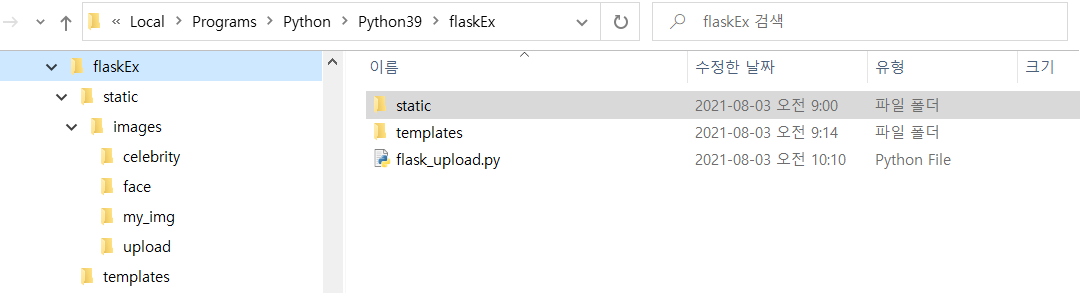

* **2. python flask_upload.py 실행**
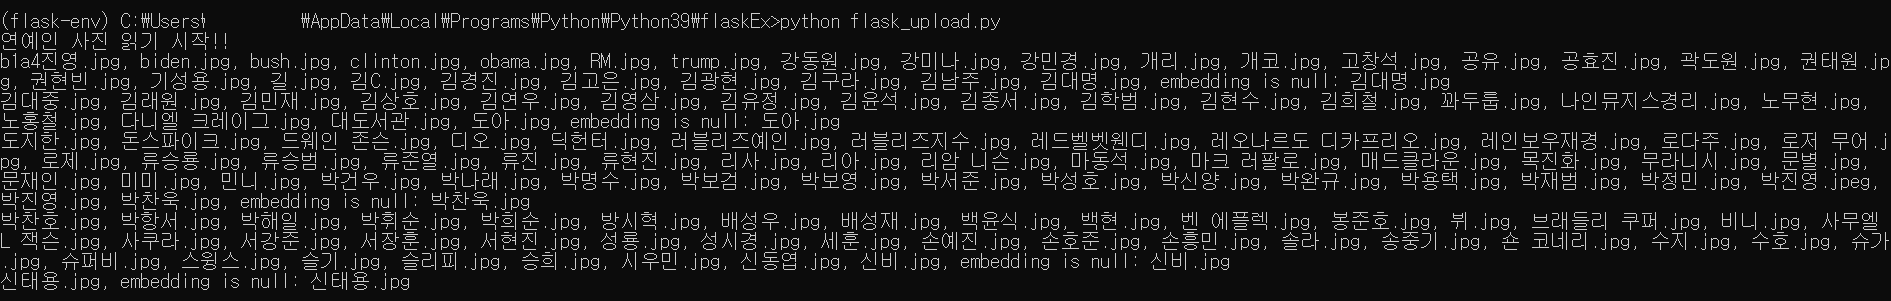

* **3. Web Server 5000포트 오픈으로 대기**
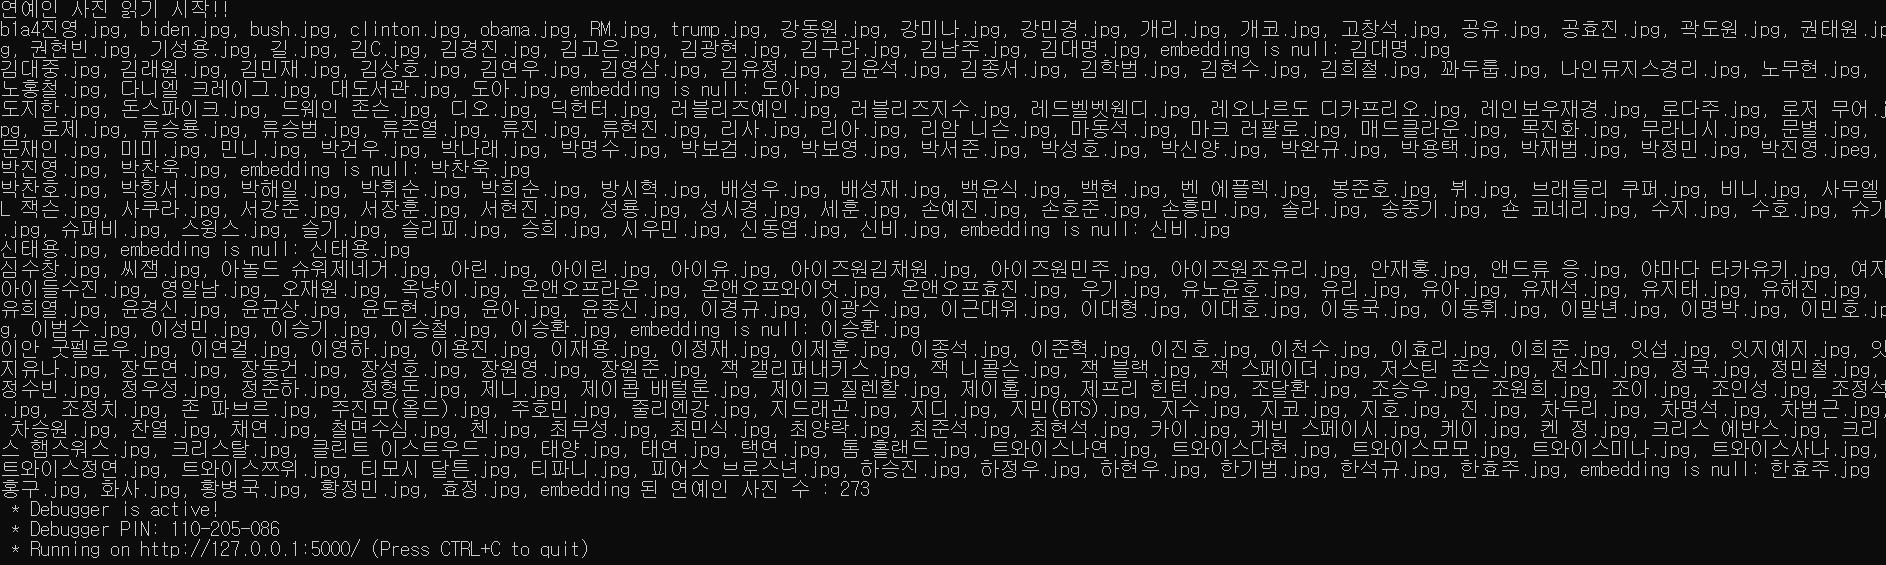

* **4. 웹페이지 접속** - 안내문구도 없고.. -_-;
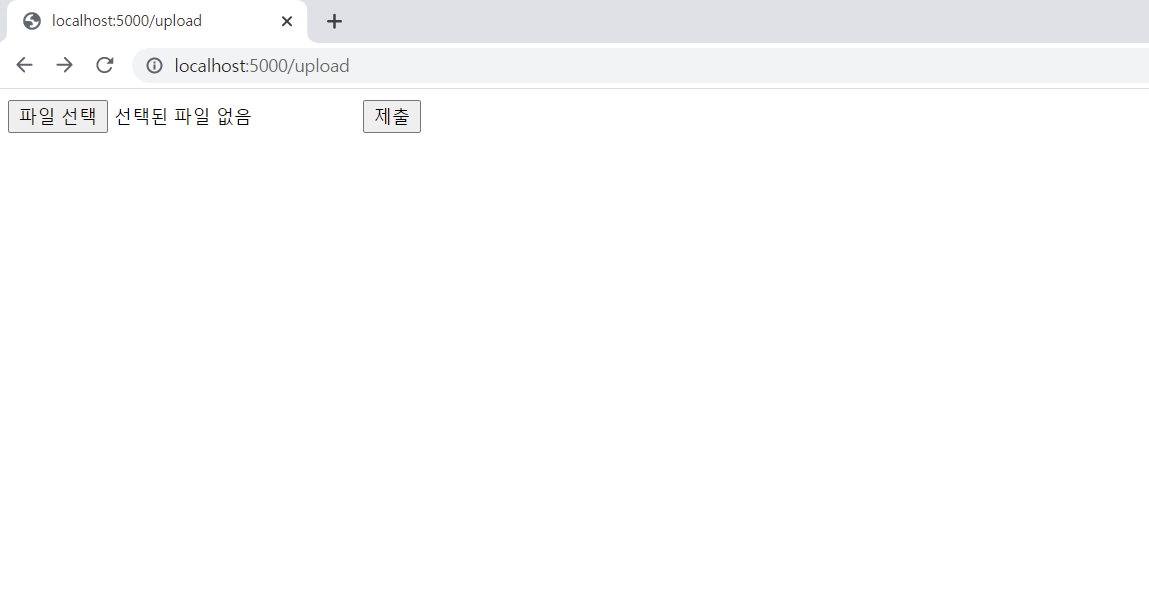

* **4. 내이미지 업로드**
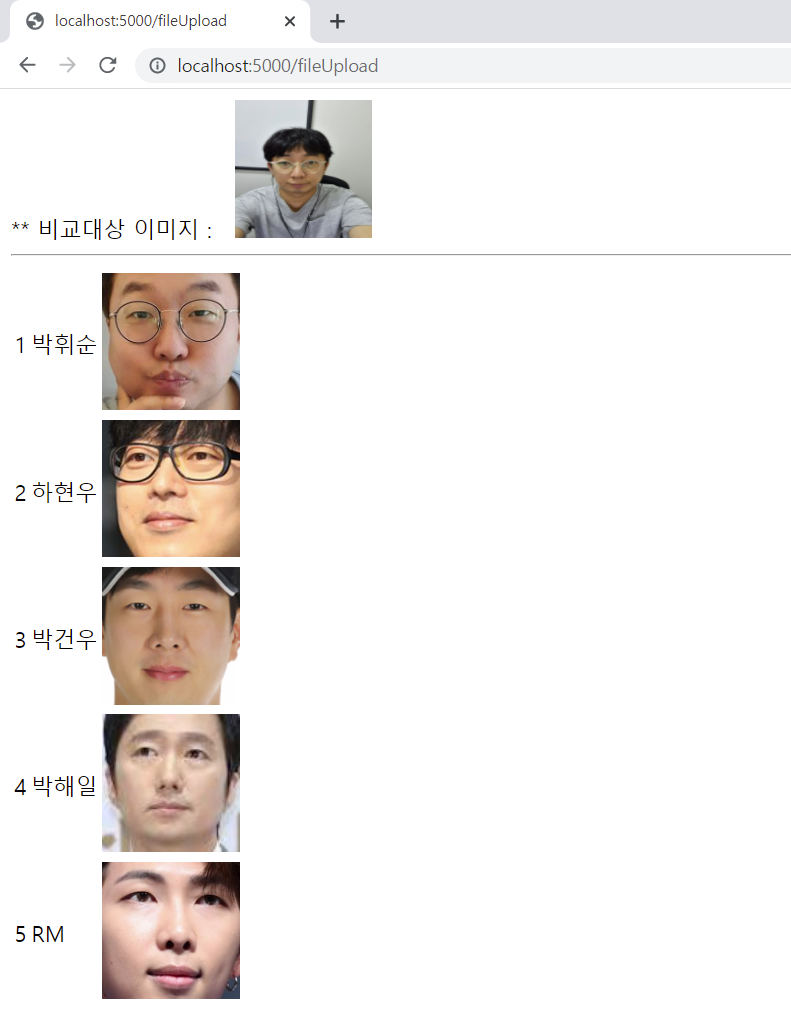
<hr>
**아..1위가.. 박휘순님.... ㅠㅠ**
<hr>

* **5. 고양이 콧수염달던 송중기님 사진 업로드 - ( 연예인 얼굴폴더의 송중기 사진과 다른것 업로드)**
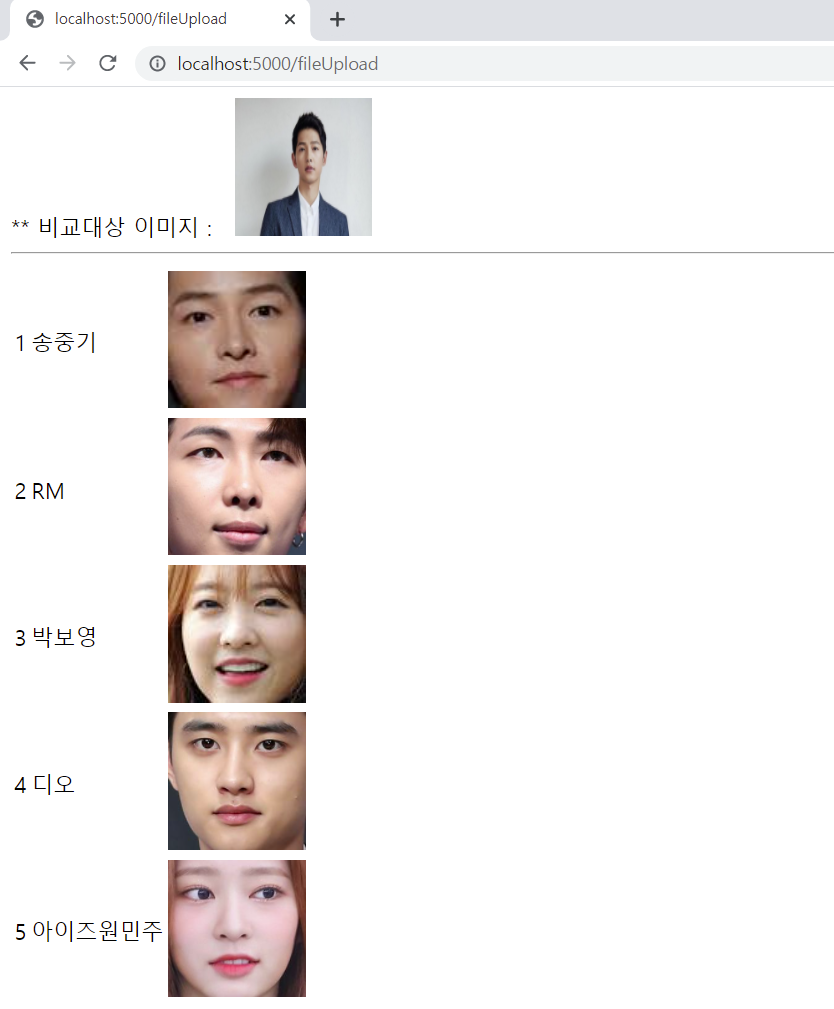

#### 오.. !!

## 회고


## 1. 이번 프로젝트에서 어려웠던 점

> 하필.. 최초 작업본(Exploration 작업본 - 7/27)을 aiffel 밖의 폴더에 저장해서, 날려먹었습니다~ ^- ^;; ㅎ ㅏㅎ ㅏ;; ㅠㅠ

### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점.

**알아낸 점**
> face_recognition, flask, django 등 좋은 모듈들을 알게되었음~

**모호한 점**
> 원본 이미지가 아닌, face폴더의 이미지를 읽어서 이미지간 distance를 구할때, 원래 소스와 다른 오류가 난다는 부분...

### 3. 루브릭 평가 지표를 맞추기 위해 시도한 것들.
> flask 라는 웹 모듈에 대한 자료 수집( conda설치, 가상환경구성, flask 설치, rander_template의 이미지 표현 등.. )

### 4. 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정.

> flask 모듈의 rander_template 내에서 이미지 표시하는게 생각보다 오래걸렸음( static 이란.. 것에 대한 이해가 부족했었기 때문.. )

### 5. 자기 다짐

> 앞으로는 작업본을 저장할 때 잘 저장해야겠음..